# Lecture 2.2: Advanced ``ggplot``

<div style="border: 1px double black; padding: 10px; margin: 10px">
   
**Goals in this lecture:**
    
* [Statistical Transformations](#Statistical-Transformations)
* [Position Adjustments](#Position-Adjustments)
* [Coordinate Systems](#Coordinate-Systems)
    
This lecture note corresponds to Sections 3.7-3.10 in the book. 

</div>



# Statistical Transformations

In a lot of graphs, `ggplot` will automatically transform the original variable into some other variables.   This is called statistical transformation.  We will investigate statistical transformations through working on several examples.  Recall the **diamonds** data set in the previous lecture.

In [3]:
library(tidyverse)
print(diamonds)

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 0.23  Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2 0.21  Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3 0.23  Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4 0.290 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5 0.31  Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6 0.24  Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7 0.24  Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8 0.26  Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9 0.22  Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10 0.23  Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


Let us create a **bar chart** using the **cut** variable. This is done by the ``geom_bar`` geometry.

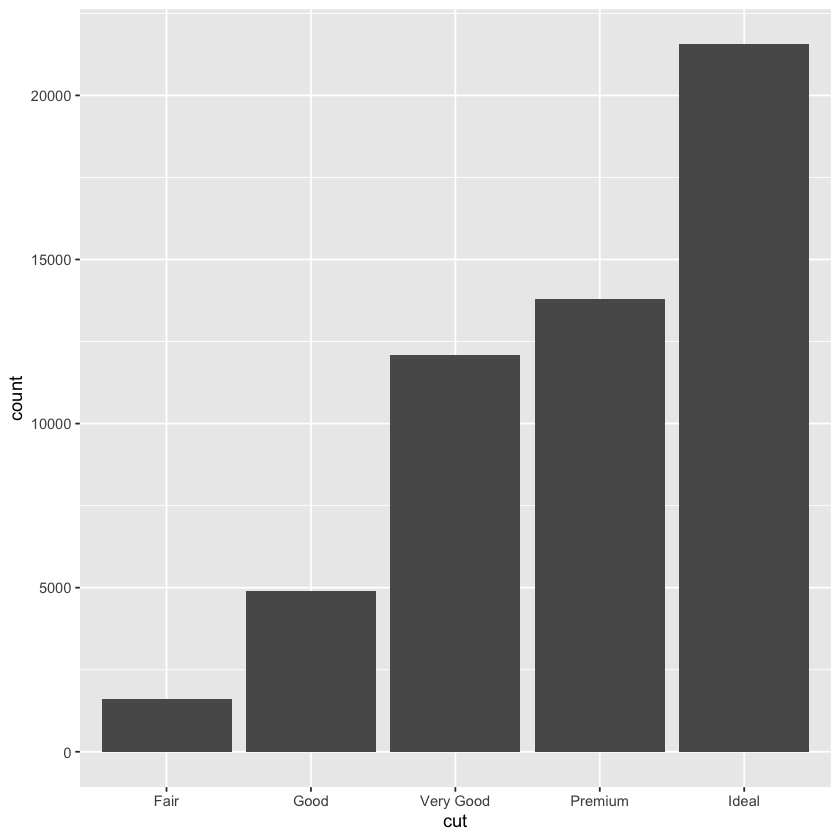

In [2]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut))

The `y-axis` on the bar chart is **count**, and the `x-axis` is the **cut** of the diamond.  The bar chart shows that more diamonds are available with high-quality cuts than with low quality cuts. 

The `y` variable here, **count**, is not even a variable in our data set! What's going on? 🤔

Bar chart basically bin your data, and then plot the bin counts according to the variable **cut**. 

In other words, a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemtries and Statistical Transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

You can generally use geoms and stats interchangeably.  For example, you can recreate the previous plot using `stat_count` instead of `geom_bar`.  

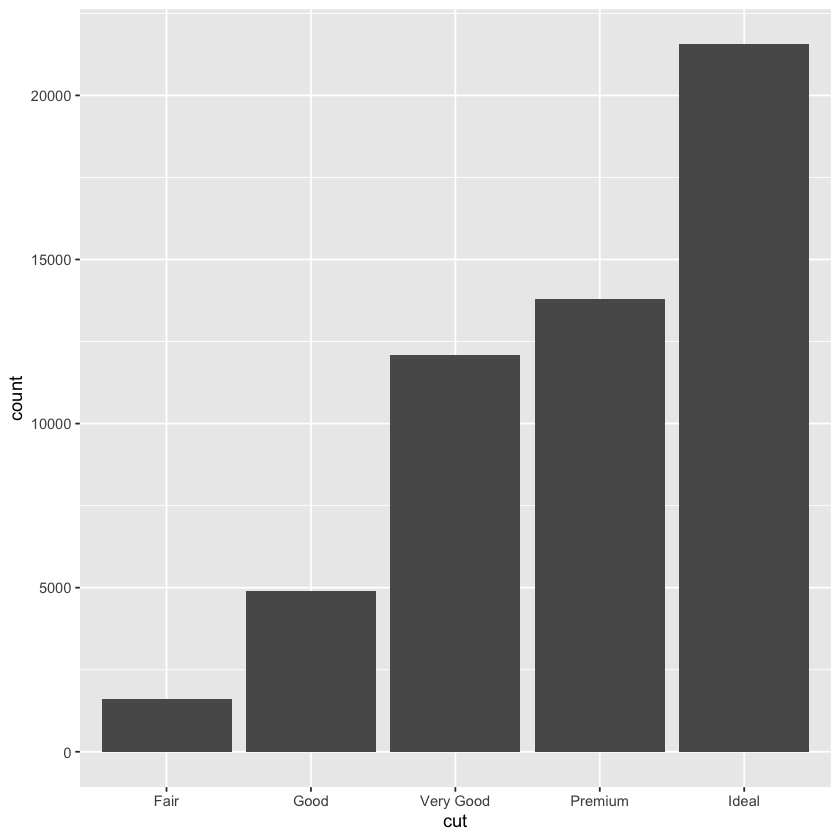

In [5]:
ggplot(data = diamonds) +
    stat_count(mapping = aes(x = cut))

### Override the default transformation

Usually you can typically use `geoms` without worrying about the statistical transformation.  However, there are several situations where we may need to use a `stat` explicitly. An example of a situation when you might want to override the default transformation is the following.

Suppose that in your data, you already have the frequency of the diamond cuts summarized as follows.  

In [6]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)
print(demo)

# A tibble: 5 x 2
  cut        freq
  <chr>     <dbl>
1 Fair       1610
2 Good       4906
3 Very Good 12082
4 Premium   13791
5 Ideal     21551


**Note**: **tibble** is very similar to **data.frame** and we will learn more about it later in the course. 

Now try to plot a barchart for the dimaonds based on the variable **cut** on your new data called **demo**.

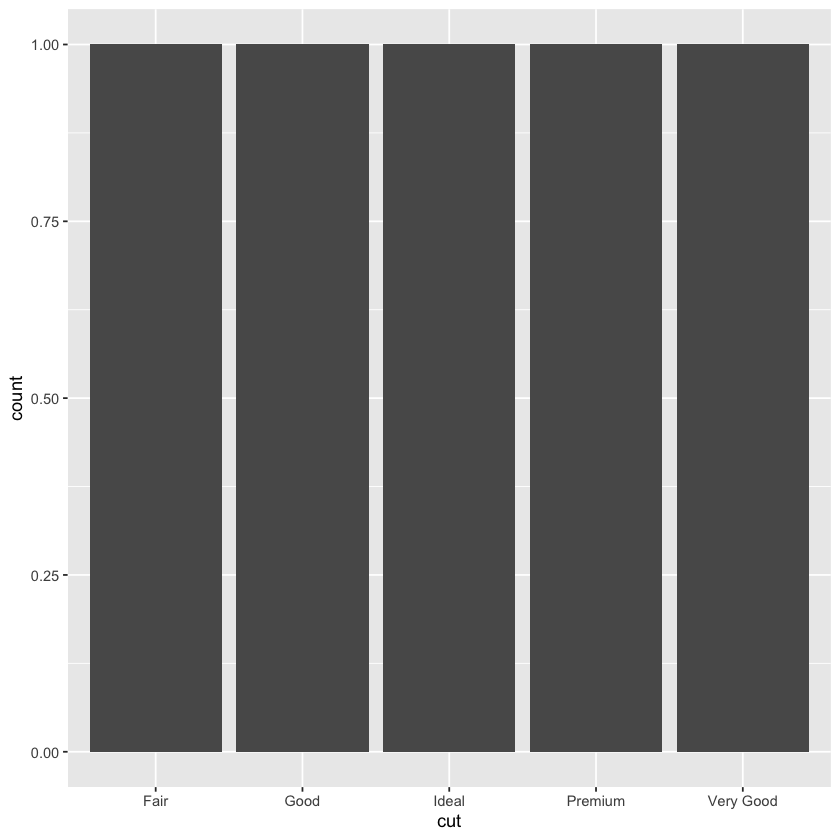

In [8]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut))

Yikes! What is going on here 😱?  The default statistical transformation for `geom_bar` is `stat_count`, which basically counts how many observations are actually fair/good/.../Ideal. In this new data set, we have the frequency recorded for each of the cut, and thus only one observation for each cut.  

Now we will modify the default `stat_count` in `geom_bar` to plot the same barchart as the one that we have seen before. 

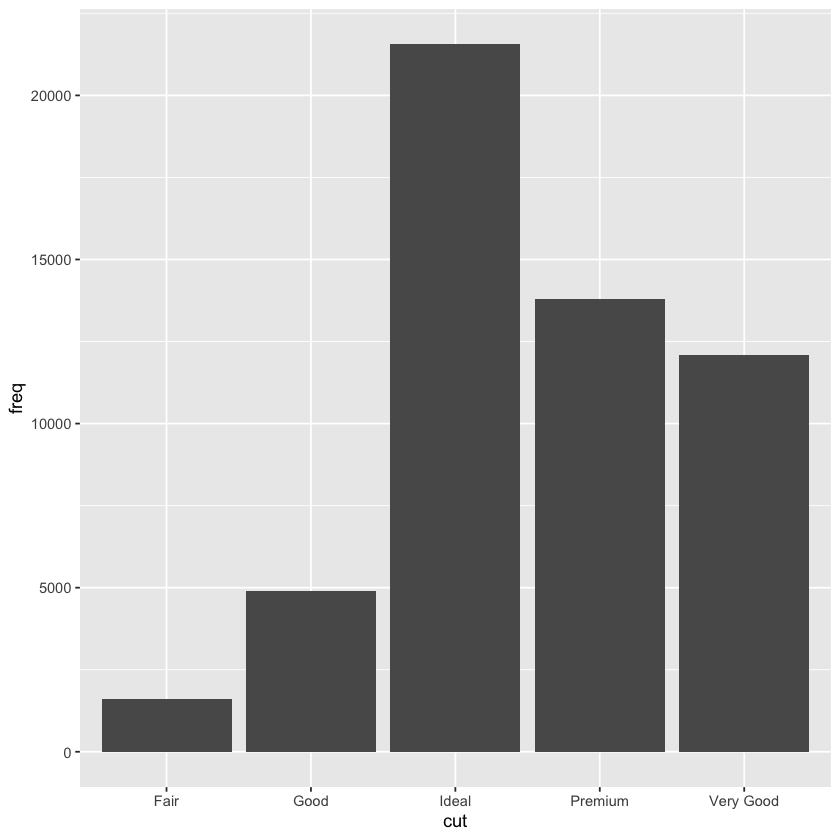

In [7]:
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

In the above code, we have modified the `stat` to be `identity`, indicating that we do not want `geom_bar` to automatically perform any statistical transformation to our data.  We also indicate that we want the `y-axis` of the barchart to display `frequency`.  

### Question: what if we want to change the order of the cut

If you want the categories to be ordered in some other way, you can create a factor with levels in your desired order. Note that `demo$cut` is the way we refer to the `cut` column of the tibble `demo`.

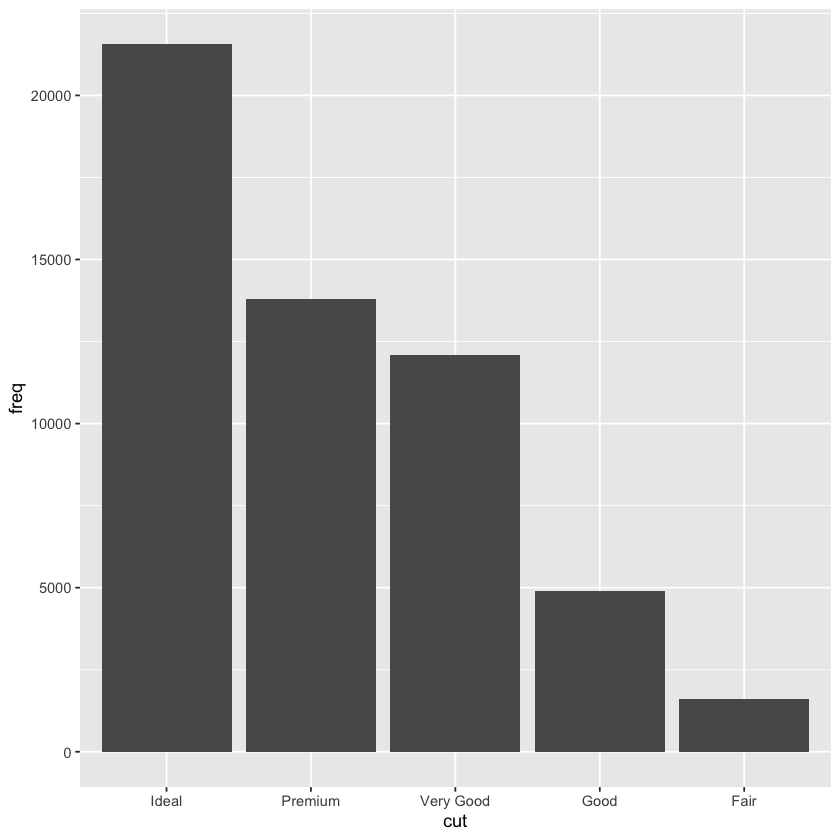

In [4]:
demo$cut <- factor(demo$cut, levels = c("Ideal", "Premium", "Very Good", "Good", "Fair"))
ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

**Remark:** We have used `geom_bar` to plot a barchart where the `y-axis` is frequency/counts, the `x-axis` is cut, and the bar height represents **counts/frequency**.  What if we want to plot a bar chart with the bar heights representing some values in the data? 

`geom_col` is used when you wants the bar heights to represent values in the data. E.g., the plot below shows the total **price** (in millions of dollars) of the diamonds in each **cut** category.

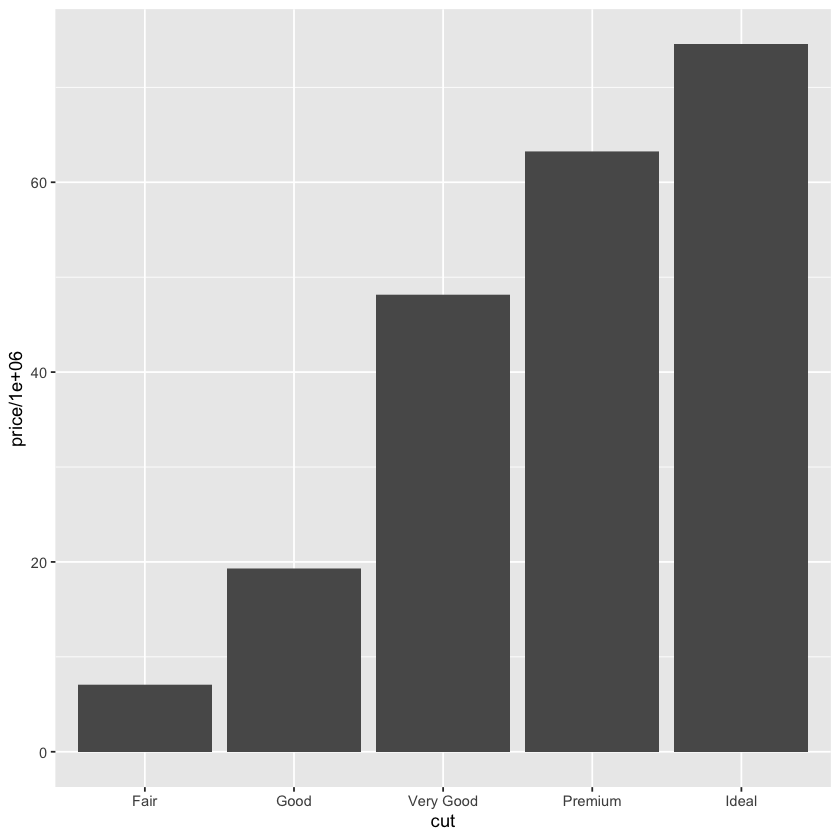

In [5]:
ggplot(data = diamonds) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

There are a lot of transformations that `geom_bar` is doing internally to create the plot above. E.g., one way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [6]:
(my_tibble <- select(diamonds, cut, price) %>%
    group_by(cut) %>%
    summarise(total_price_millions = sum(price)/1e6))

cut,total_price_millions
<ord>,<dbl>
Fair,7.01760
Good,19.27501
Very Good,48.10762
Premium,63.22150
Ideal,74.51349


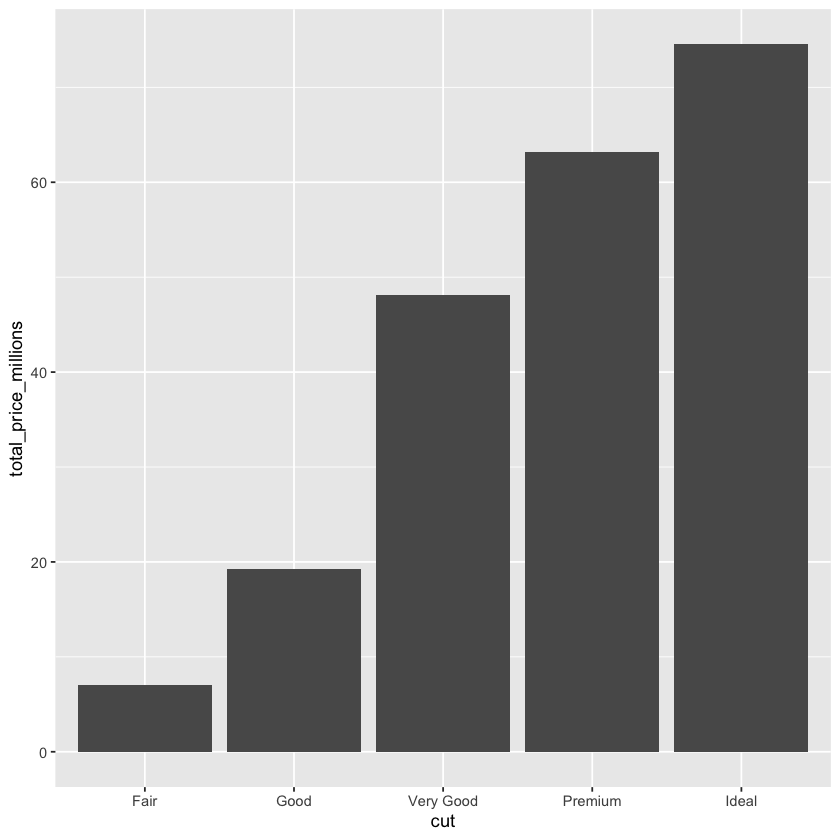

In [7]:
ggplot(data = my_tibble) +
    geom_bar(mapping = aes(x = cut, y = total_price_millions), stat = "identity")

# Position Adjustments

We can incorporate various modifications to our barchart, and this is done with what we referred to as position adjustments.  Let us see what happens when we map the **color** aesthetic to the **cut** variable in `geom_bar`.

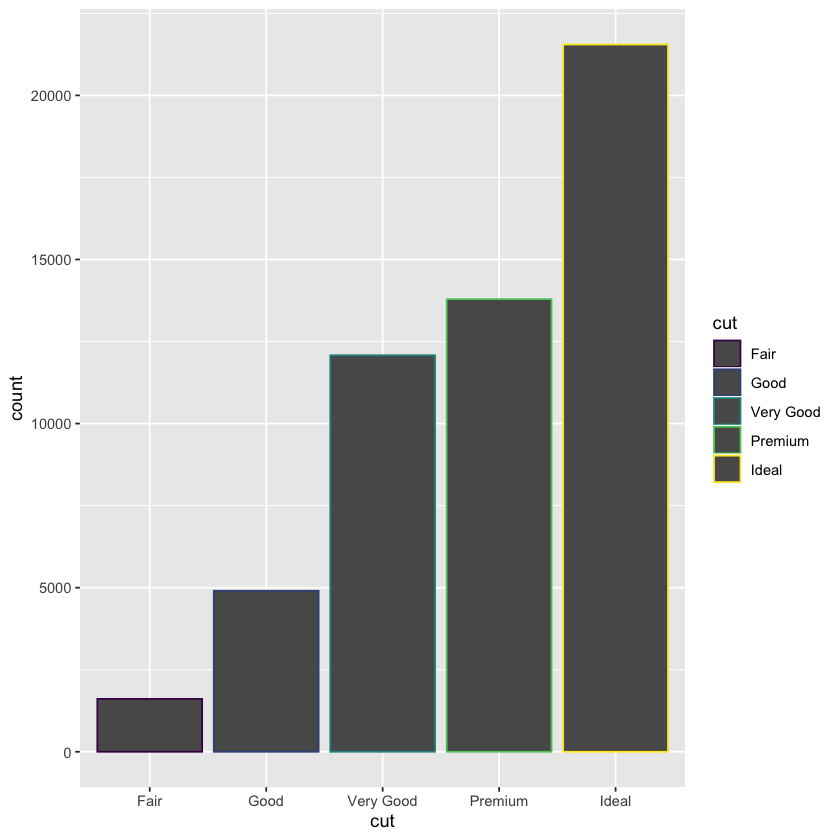

In [8]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, color = cut))

It just changed the boundary color. Using the **fill** aesthetic will change the color of the entire bars.

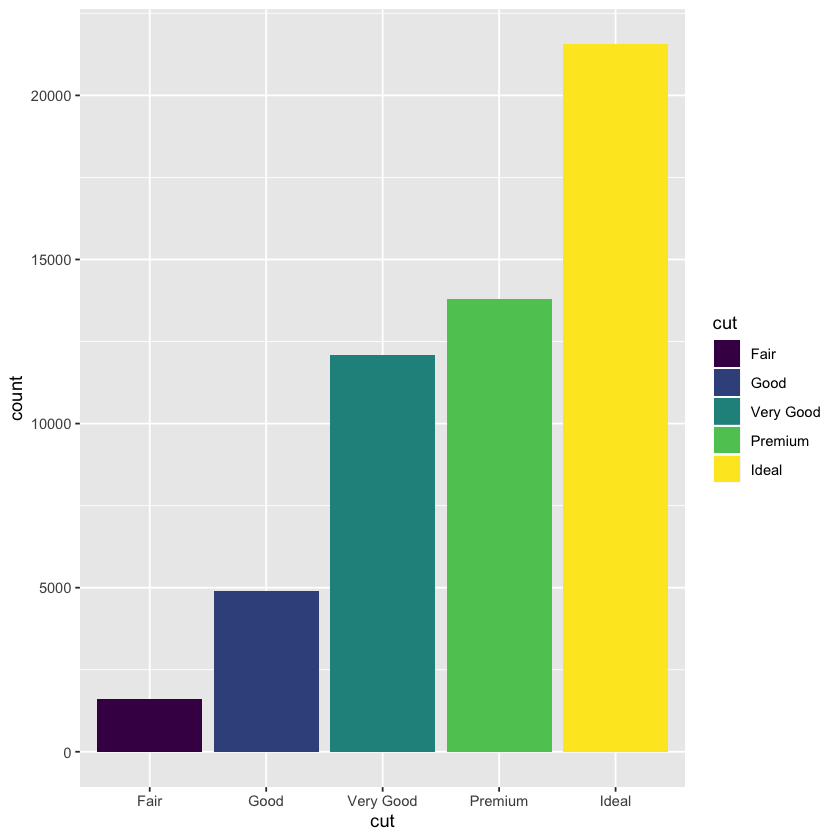

In [9]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut))

Adding colors to each cut is not really helpful here since each column is already representing the different cuts.  How about we map the `fill` aesthetic to some variable other than **cut**, say **clarity**?

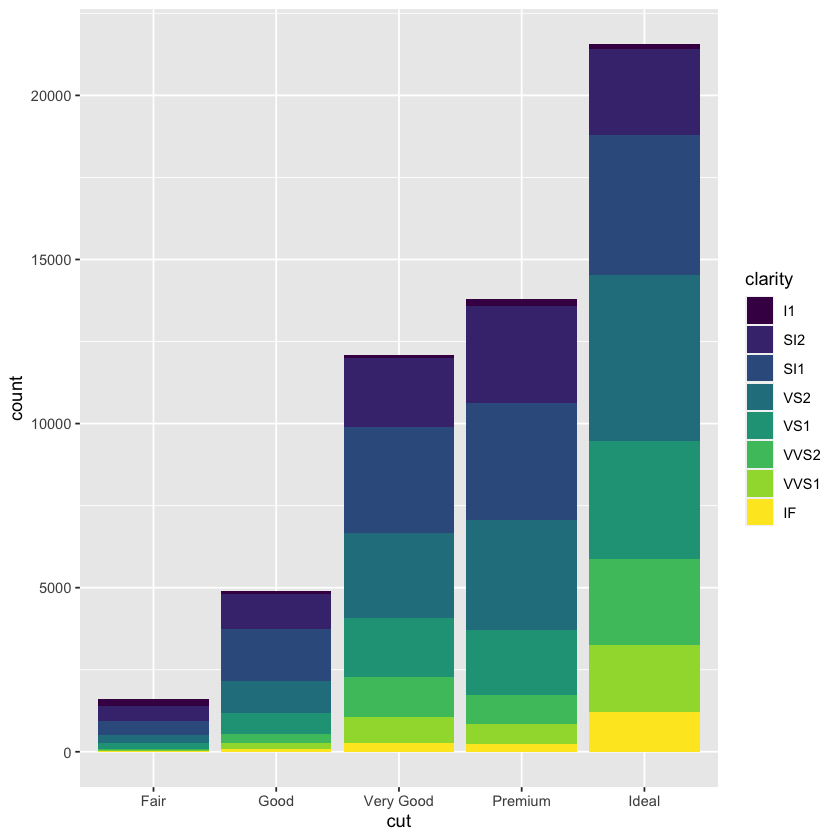

In [9]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity))

We see that the above code stacks the bars based on its clarity for each cut.  The width of each color is different, denoting the number of counts for each of the clarity for each cut.  

If stacking is not the behavior you want, you can set the **position** argument to something else.  For `geom_bar` there are three options -- `identity`, `fill`, and `dodge`.

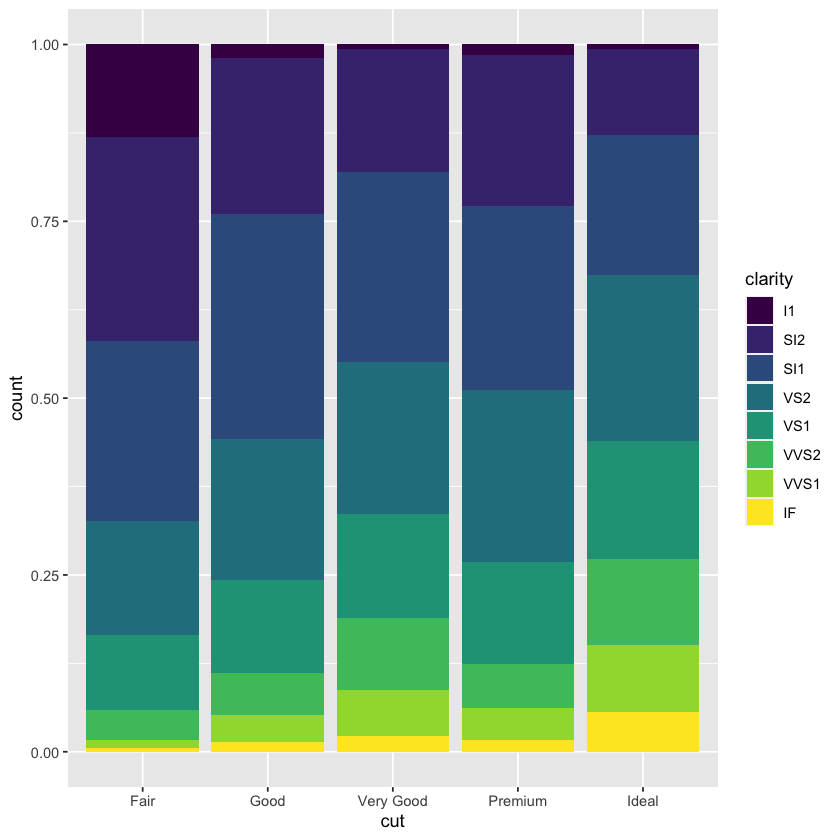

In [10]:
ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill") # stacks but shows proportions

Position `fill` works like stacking but makes each set of stacked bars the same height.  The `y-axis` is replaced by the proportion rather than counts.  This can be useful when we are interested in understanding the proportion of clarity within each cut. In fact, the above plot suggests that for diamond that is cut ideally, the clarity tends to also be high.    

We could also plot a barchart seperated by clarity and cut simultaneously using `position = "dodge"`.  This will put the bars side by side.  

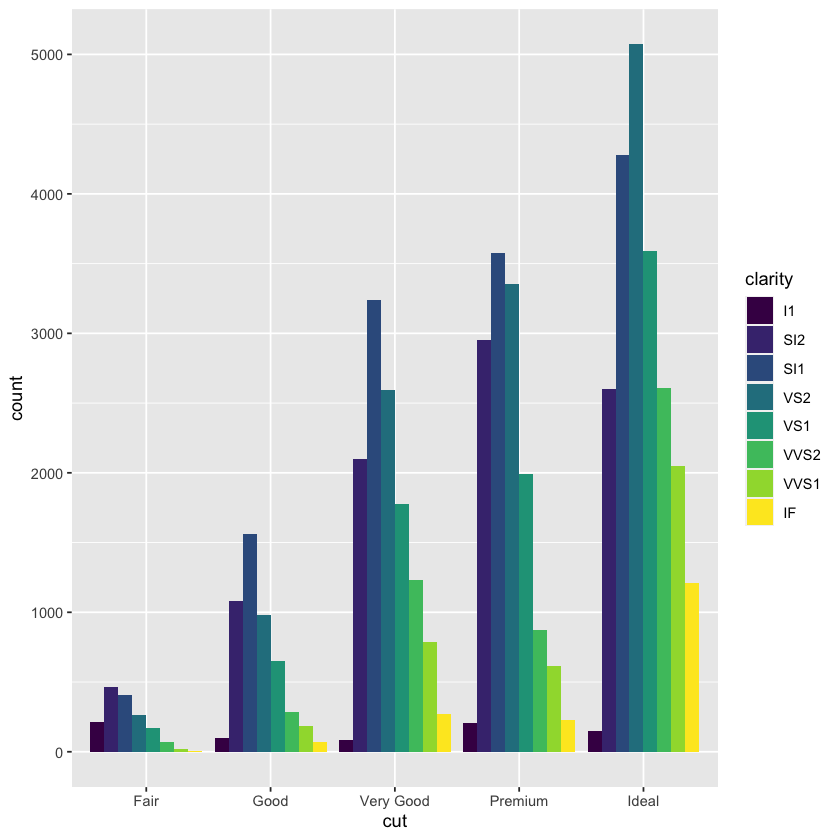

In [11]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

# Coordinate Systems

Next we are going to talk about how we modify the coordinate system of the graph.  By default, we have the Cartesian coordinate system where we have `x-axis` and `y-axis` to indicate the position of each point. In certain cases, we may find some other coordinate systems helpful.    

Let us start simple by making our bars in our bar charts touch each other. 

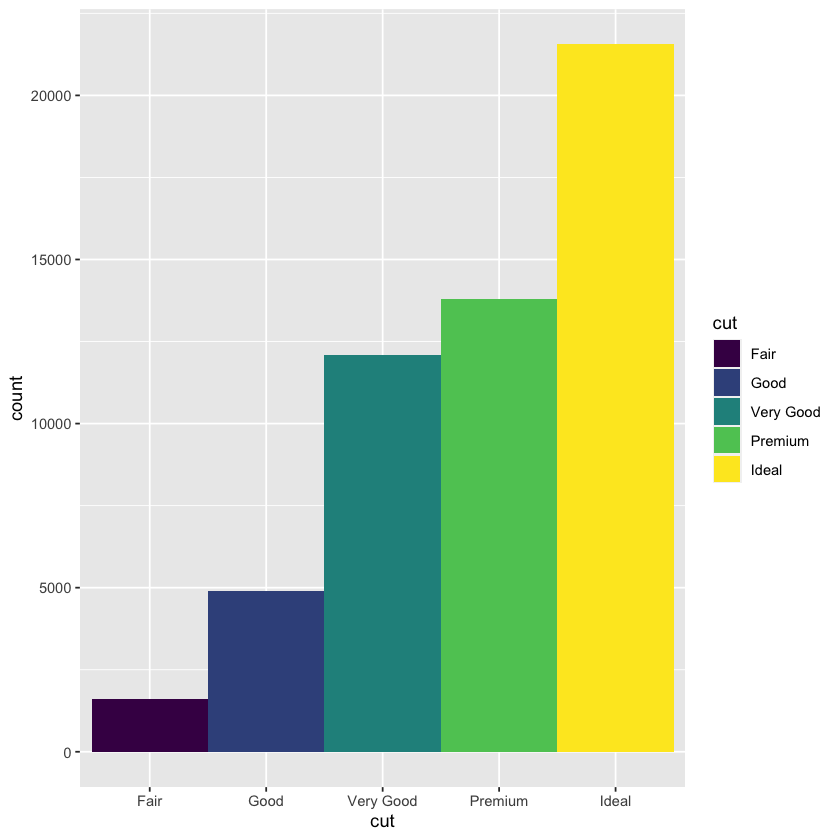

In [12]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = cut, fill = cut), width = 1)) 

We set width so that the bars touch.  Now let us change to polar coordinates and see what we get.  

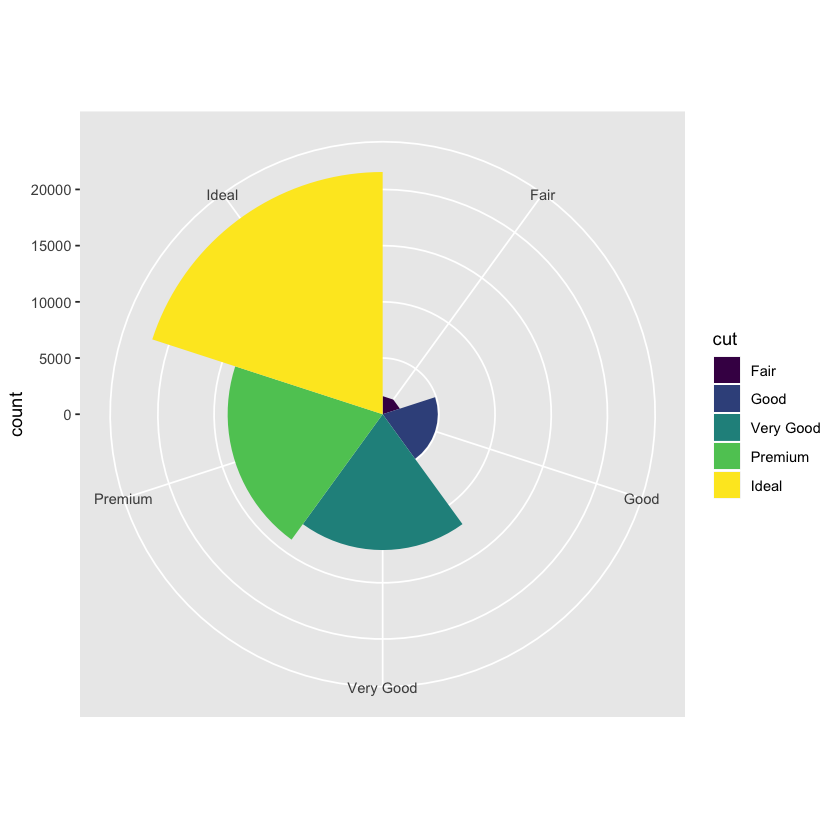

In [18]:
bar +
    labs(x = NULL) + # remove the x axis label "cut"
    coord_polar() # change to polar coordinates to get a Coxcomb chart

This is also called the **Coxcomb chart**.  `labs(x = NULL)` removes the `x-axis` label "cut", and `coord_polar` changes the cartersian coordinates to polar coordinates. 

### Remark: 
Remember `ggplot` is layer-based.  What we did above is to create a bar charts and assign it to the variable bar.  Then, we add in some additional arguments and convert the bar charts into polar-coordinate, giving us a coxcomb chart.  The following code will also produce the same plot.  

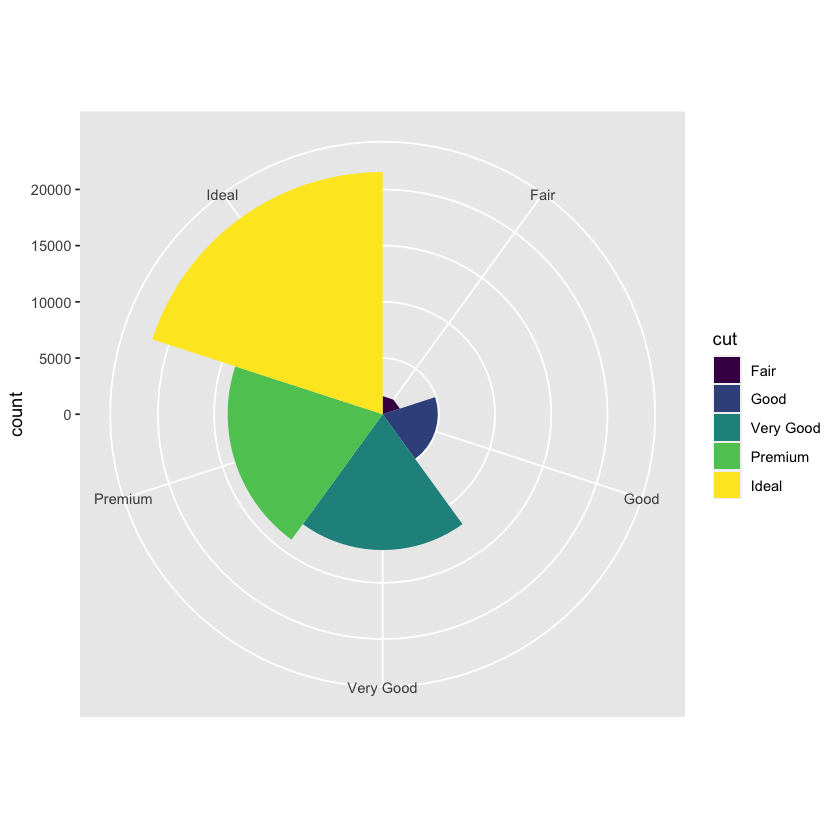

In [18]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut, fill = cut), width = 1) + labs(x = NULL) +  coord_polar()

### Pie Chart! 

A **pie chart** is a circular chart where the angle of each wedge is proportional to the frequency of each category. Mathematically, this amounts to mapping the $y$ coordinate (height) to angle (radians). `ggplot()` lets us make pie charts, though it is not easy. (There is no `geom_pie()`.)

To get a **pie chart**, we have to create a **stacked bar chart** first

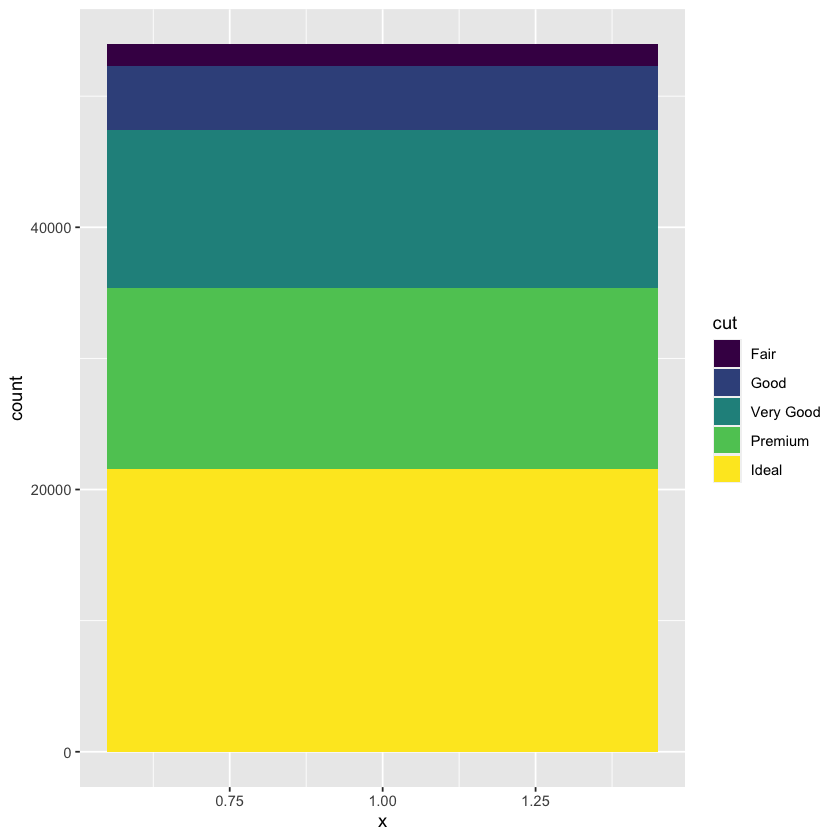

In [23]:
(bar <- ggplot(data = diamonds) +
    geom_bar(mapping = aes(x = 1, fill = cut)))

Note the use of a dummy constant variable `1` in the code fragment `geom_bar(mapping = aes(x = 1, fill = cut), width = 1))` above. This is because using the `fill` aesthetic requires me to first specify the `x` aesthetic. So I just created a dummy variable for that purpose.

Now we are going to convert the Cartersian coordinate into polar coordinate. 

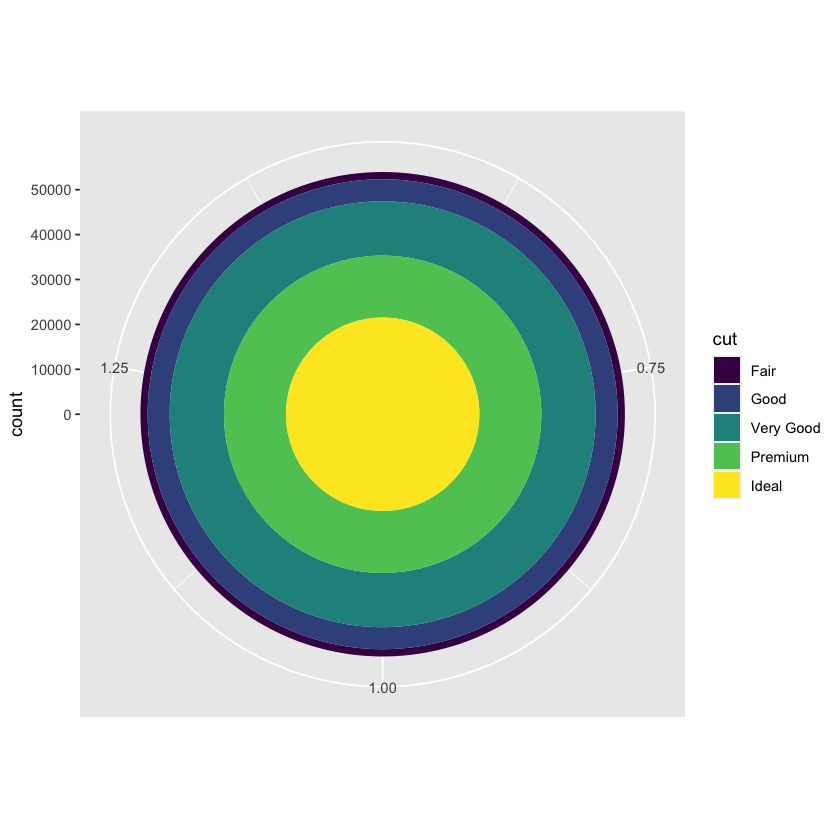

In [25]:
bar + labs(x = NULL) + coord_polar() 

Yikes, what happen here? By default, it will map to the radial coordinate giving us a **bullseye chart**.  

To get a proper pie chart, we map the Y axis of the bar chart to the angle **theta**. 

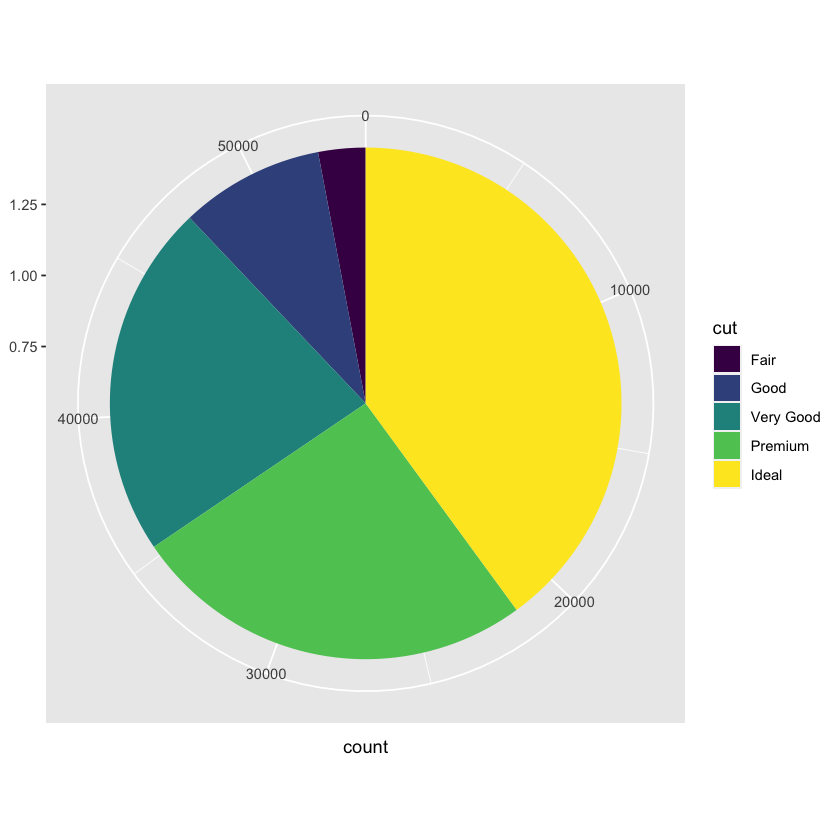

In [34]:
bar + labs(x = NULL) + coord_polar(theta ="y")

There is another use case involving a dummy variable. You might want to show proportions instead of counts. You realize reading the documentation [here](https://ggplot2.tidyverse.org/reference/geom_bar.html#computed-variables) that the `stat_count` statistical transformation internally computes variables `..count..` and `..prop..`. So you try the following code.

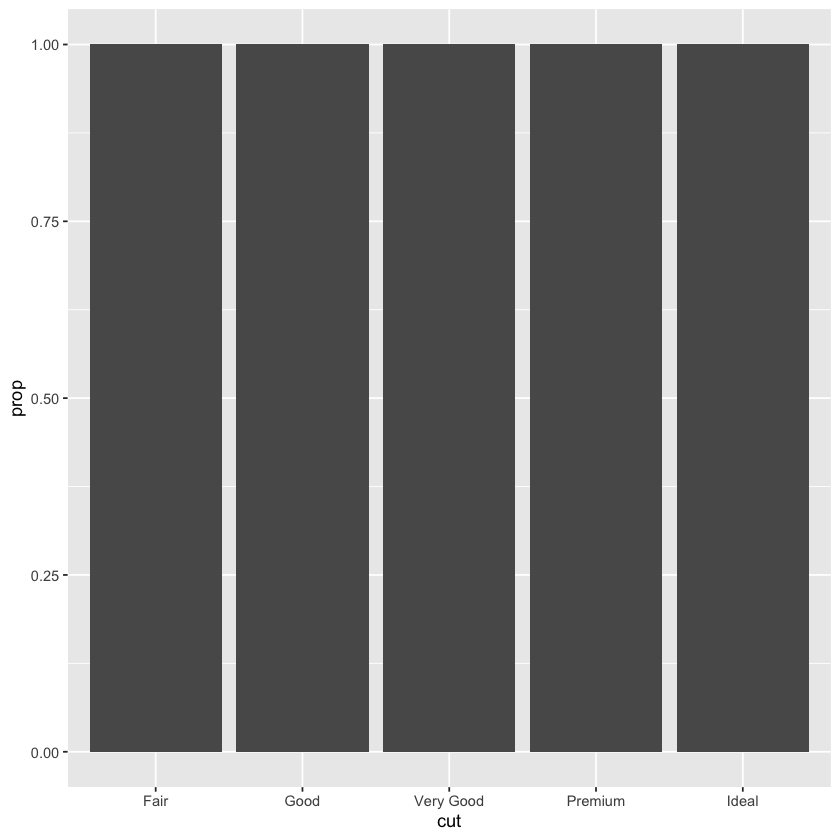

In [22]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop..))

This doesn't work because the rows get grouped by `cut` and within each group, the proportion of that `cut` category is obviously 1. So, again the solution is to use a dummy variable. It doesn't matter what the value of the variable is. We can set it to 306!

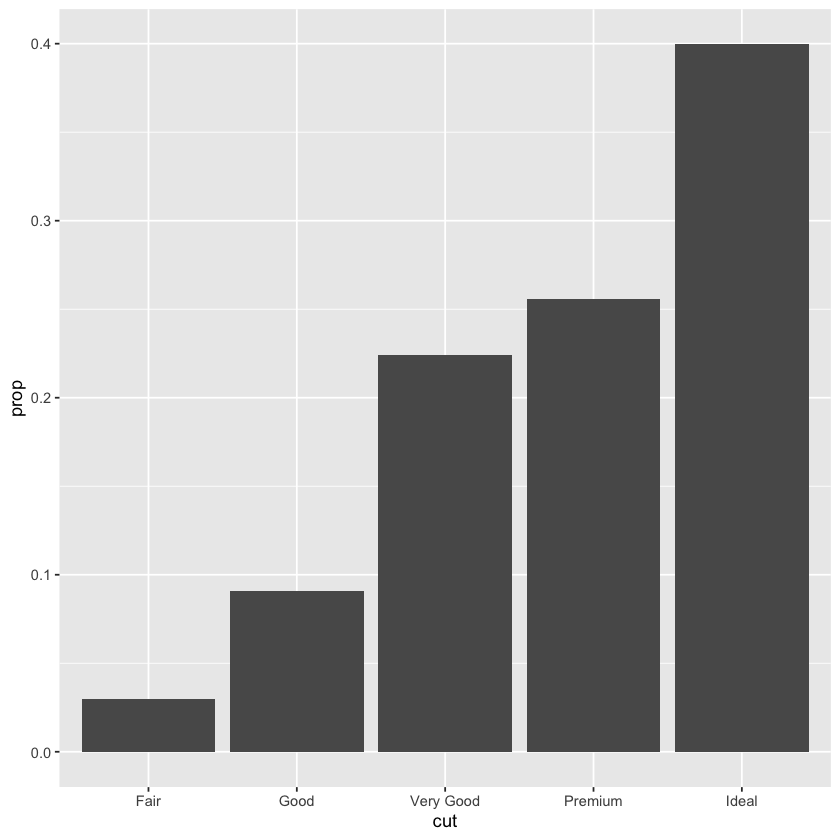

In [23]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 306))

Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```